# Charity Shop Exploratory Data Analysis

Now we have our cleaned and transformed data, we can begin exploring the data and looking for insights and trends.
The most important graphs are shown in the Power BI report and are explained in more detail throughout the report.

In [3]:
import pandas as pd
df_sm = pd.read_excel("Charity Shop.xlsx", sheet_name = "Space Management", index_col = None)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
%matplotlib inline

In [7]:
df_sm.head()

,date week commencing,category,sub category,Dept £,Dept %,No. items sold,Average selling price £,No. of bays,% of space,Average sale per bay £,Day,Month,Year,Modified Month,Modified Year
0,20/07/2025,clothing,Ladies Tops,451.37,12.11,72,6.269028,2.0,8.33,225.685,20,7,2025,7,2025
1,20/07/2025,clothing,Ladies Knitwear,54.75,1.47,9,6.083333,0.5,2.08,109.500,20,7,2025,7,2025
2,20/07/2025,clothing,Ladies Skirts,85.81,2.30,12,7.150833,0.5,2.08,171.620,20,7,2025,7,2025
3,20/07/2025,clothing,Ladies Trousers,186.06,4.99,29,6.415862,1.0,4.17,186.060,20,7,2025,7,2025
4,20/07/2025,clothing,Ladies Dresses,140.25,3.76,15,9.350000,3.0,12.50,46.750,20,7,2025,7,2025


In [9]:
df_sm.shape

(4633, 15)

Create a variable, x, to store the date values for easy plotting.

In [11]:
x = pd.to_datetime(df_sm['date week commencing'].unique(), format='%d/%m/%Y')

Create dataframes for clothig values and non clothig values

In [15]:
df_c = df_sm[df_sm['sub category'] == 'Total For Clothing']
df_nc = df_sm[df_sm['sub category'] == 'Total For Non Clothing']

Create dataframe for home sub category

In [25]:
df = df_sm[df_sm['sub category'] == 'Home']

Plot the home sub category's values for percentage of space it occupies in the shop and percentage of revenue of the shop it generates, over time.

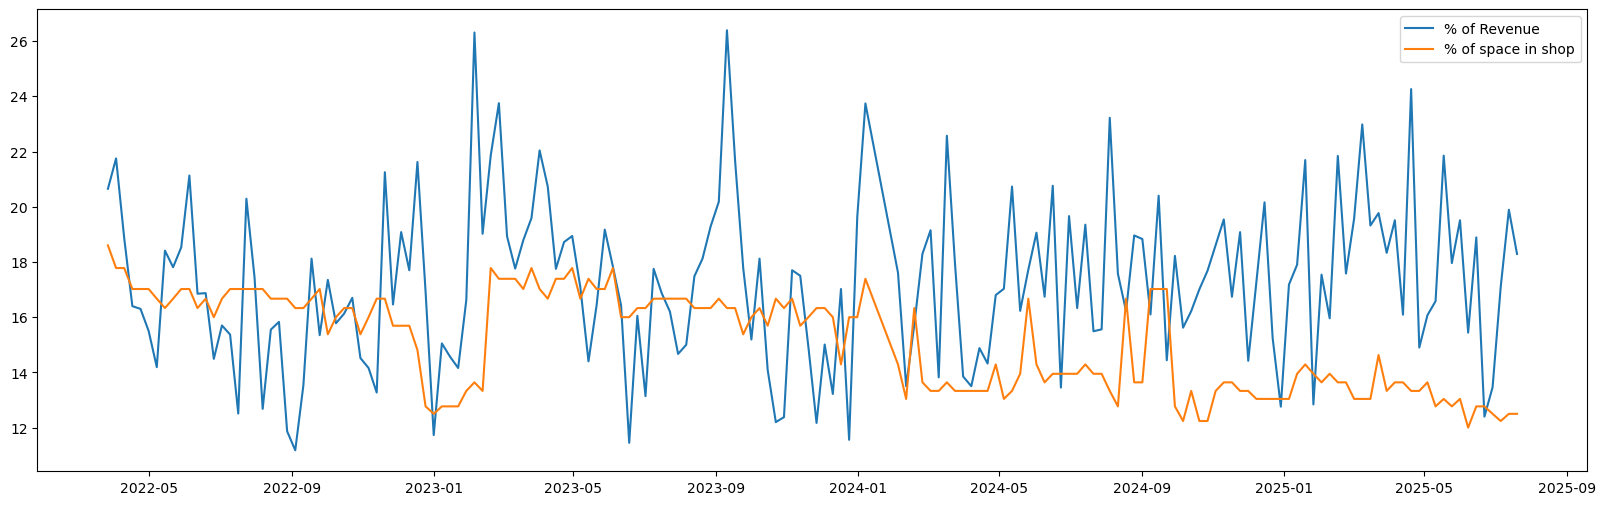

In [29]:
plt.figure(figsize = (20,6))
plt.plot(x, df['Dept %'])
plt.plot(x, df['% of space'])
plt.legend(labels = ('% of Revenue', '% of space in shop'), loc = 'upper right')
plt.show()

Plot for all clothing values the percentage of space they occupy in the shop and percentage of revenue of the shop they generate, over time.

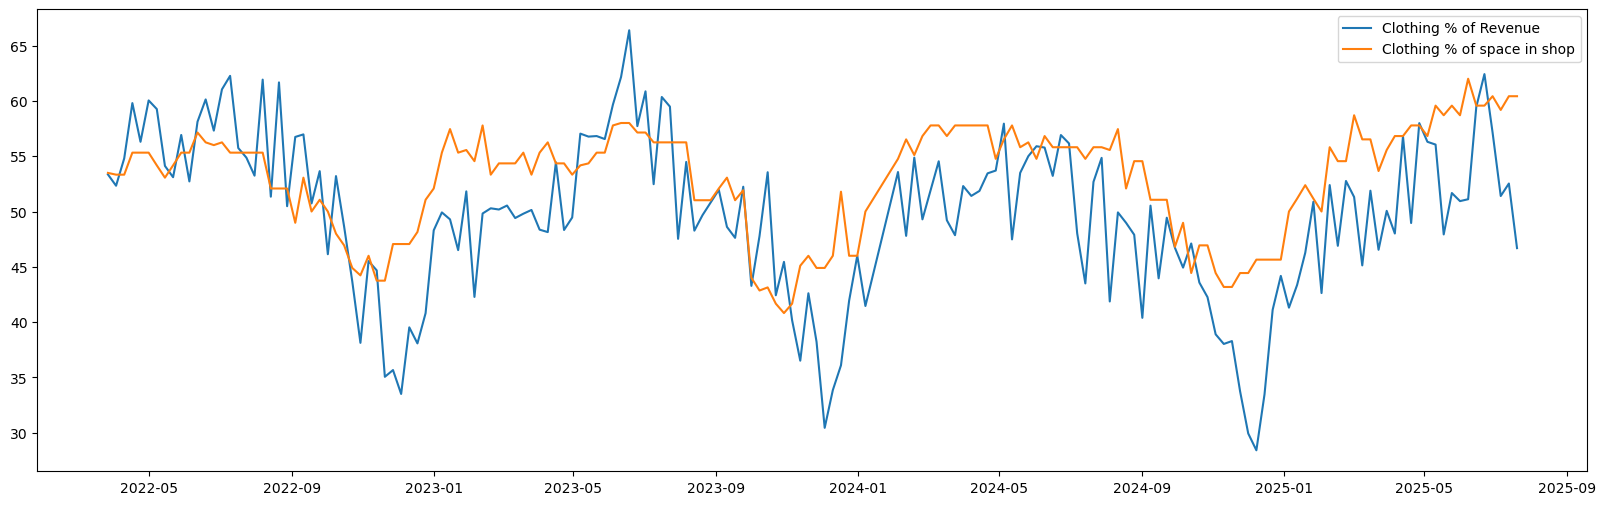

In [35]:
plt.figure(figsize = (20,6))
plt.plot(x, df_c['Dept %'])
plt.plot(x, df_c['% of space'])
plt.legend(labels = ('Clothing % of Revenue', 'Clothing % of space in shop'), loc = 'upper right')
plt.show()

Plot for all non clothing values the percentage of space they occupy in the shop and percentage of revenue of the shop they generate, over time.

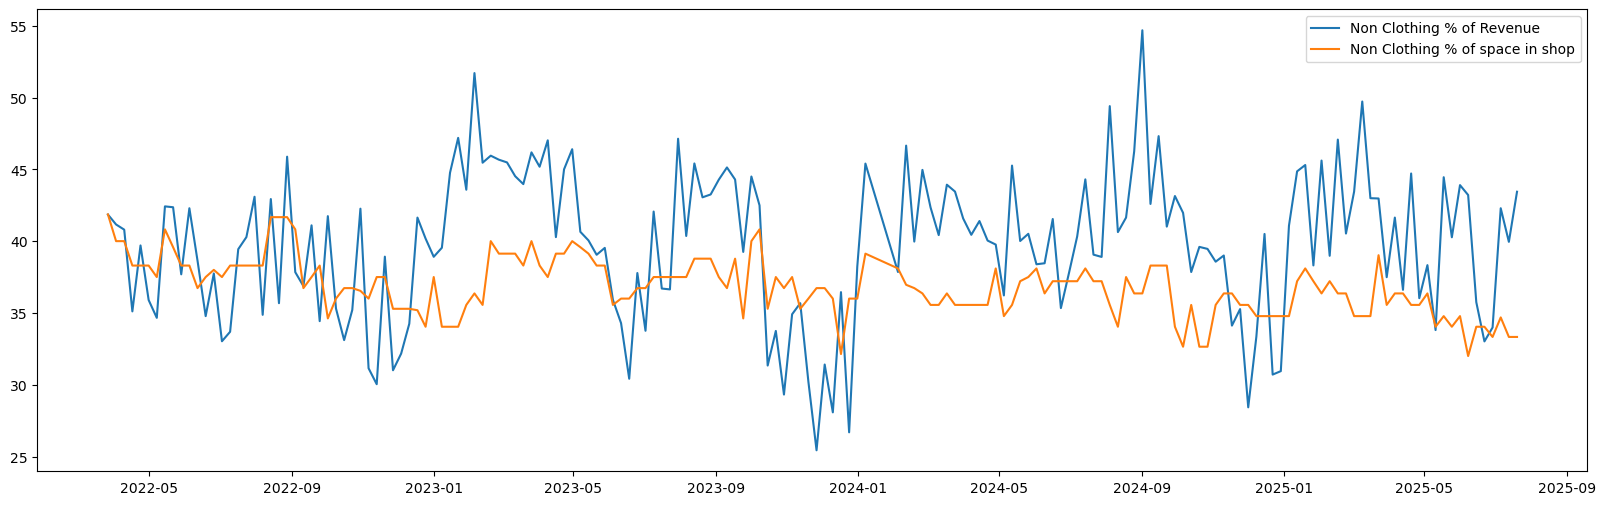

In [37]:
plt.figure(figsize = (20,6))
plt.plot(x, df_nc['Dept %'])
plt.plot(x, df_nc['% of space'])
plt.legend(labels = ('Non Clothing % of Revenue', 'Non Clothing % of space in shop'), loc = 'upper right')
plt.show()

Calculate differences in percentage of revenue and percentage of space occupied for both clothing and non clothing categories.

In [39]:
df_c['% diff'] = list(df_c['Dept %'] - df_c['% of space'])
df_nc['% diff'] = list(df_nc['Dept %'] - df_nc['% of space'])

C:\Users\aaron\AppData\Local\Temp\ipykernel_23956\910375518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['% diff'] = list(df_c['Dept %'] - df_c['% of space'])
C:\Users\aaron\AppData\Local\Temp\ipykernel_23956\910375518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nc['% diff'] = list(df_nc['Dept %'] - df_nc['% of space'])


Plot the percentage differences for both clothing ans non clothing against one another.

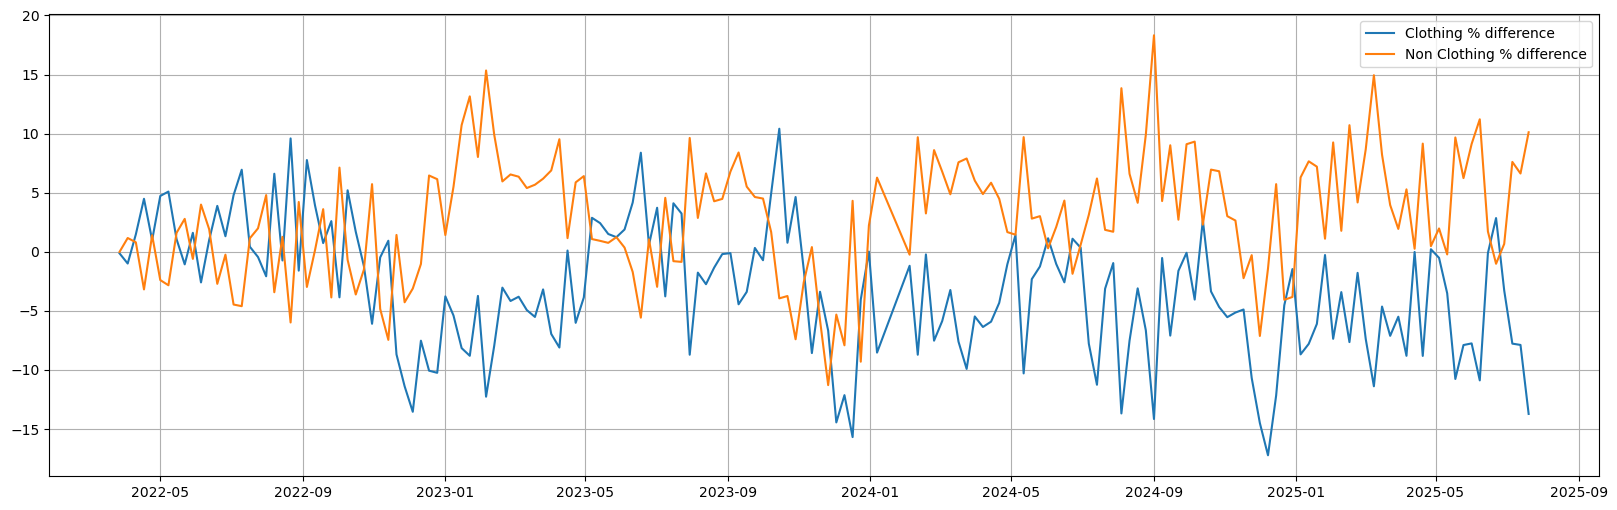

In [41]:
plt.figure(figsize = (20,6))
plt.plot(x, df_c['% diff'])
plt.plot(x, df_nc['% diff'])
plt.legend(labels = ('Clothing % difference', 'Non Clothing % difference'), loc = 'upper right')
plt.grid()
plt.show()

Create datframe specifically for sales in September 2024.

In [63]:
df = df_sm[(df_sm['Modified Month'] == 9) & (df_sm['Modified Year'] == 2024)]

In [65]:
df.shape

(108, 15)

In [67]:
df['date week commencing'].nunique()

4

In [69]:
df.head()

,date week commencing,category,sub category,Dept £,Dept %,No. items sold,Average selling price £,No. of bays,% of space,Average sale per bay £,Day,Month,Year,Modified Month,Modified Year
1177,22/09/2024,clothing,Ladies Tops,392.20,11.82,57,6.880702,1.5,6.38,261.466667,22,9,2024,9,2024
1178,22/09/2024,clothing,Ladies Knitwear,247.25,7.45,33,7.492424,1.0,4.26,247.250000,22,9,2024,9,2024
1179,22/09/2024,clothing,Ladies Skirts,57.75,1.74,9,6.416667,0.5,2.13,115.500000,22,9,2024,9,2024
1180,22/09/2024,clothing,Ladies Trousers,57.05,1.72,8,7.131250,0.5,2.13,114.100000,22,9,2024,9,2024
1181,22/09/2024,clothing,Ladies Dresses,122.75,3.70,11,11.159091,2.0,8.51,61.375000,22,9,2024,9,2024


Create dataframe for just sub categories.

In [71]:
df_subcats = df[df['category'] != 'total']

In [73]:
df_subcats.shape

(88, 15)

Create pivot table to find average values for particular columns for these sub categories in September 2024.

In [75]:
pivot = pd.pivot_table(df_subcats, values = ['Average sale per bay £', 'No. items sold', 'Dept %', 'Dept £', '% of space', 'No. of bays'], index = ['sub category'], aggfunc = 'mean')

In [77]:
pivot

,% of space,Average sale per bay £,Dept %,Dept £,No. items sold,No. of bays
sub category,,,,,,
Big Cards Wrap,2.1650,66.930000,1.0075,33.4650,33.50,0.500
Big Gifts,5.9225,138.007500,5.7300,189.4450,53.25,1.375
Big Xmas Cards,2.1650,50.580000,0.7825,25.2900,8.50,0.500
Books,8.6550,233.052500,13.7125,466.1050,219.25,2.000
Clothing Promotion,2.1650,60.625000,0.9375,30.3125,4.75,0.500
Home,16.1750,160.115208,17.4425,582.4600,193.00,3.750
Jewellery,2.1650,128.215000,1.9175,64.1075,21.25,0.500
Kids Clothing,4.3325,103.427500,3.1050,103.4275,33.25,1.000
Kids Non Clothing,8.6550,183.930000,11.0050,367.8600,174.25,2.000


Plot bar chart looking at revenue and quantity of items sold per sub category in September 2024.

C:\Users\aaron\AppData\Local\Temp\ipykernel_8060\3584045143.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



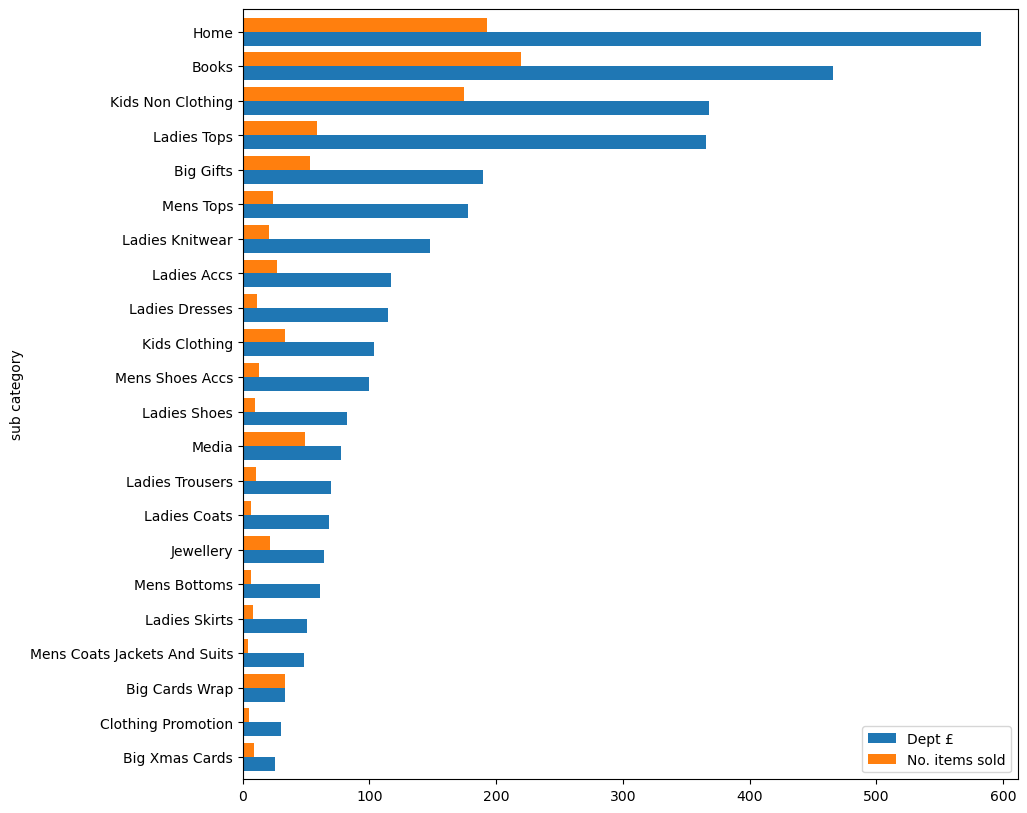

In [79]:
bar_chart_df = pivot[['Dept £', 'No. items sold']]
#print(bar_chart_df)
bar_chart_df.sort_values(by = 'Dept £', ascending = True, inplace = True)
bar_chart_df.plot(kind = 'barh', figsize = (10,10), width = 0.8)
plt.show()

Create bar chart to show the average amount of revenue each bay generates per sub category for September 2024.

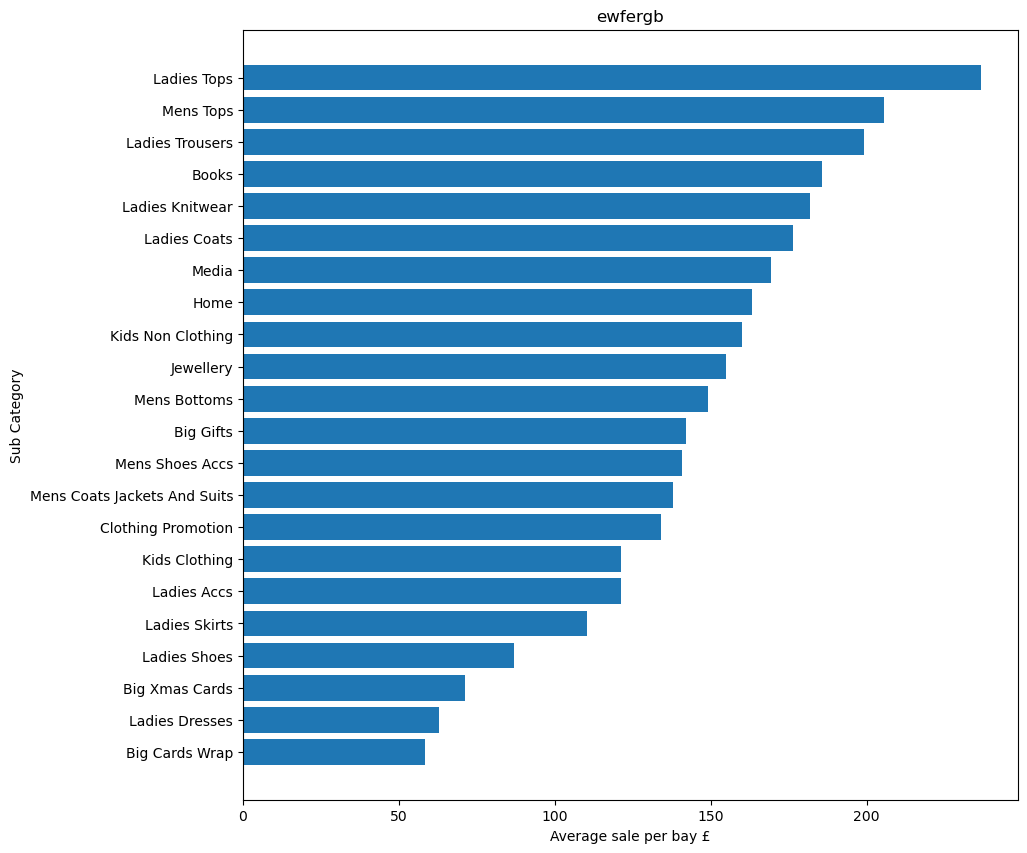

In [59]:
fig, ax = plt.subplots(figsize=(10, 10))
bar_dept_revenue_df = pivot.sort_values(by = 'Average sale per bay £', ascending = True, inplace = False)
ax.barh(bar_dept_revenue_df.index, bar_dept_revenue_df['Average sale per bay £'])
ax.set_title('ewfergb')
ax.set_ylabel('Sub Category')
ax.set_xlabel('Average sale per bay £')

plt.show()

Create sunburst plots to look at how revenue, quantity of items sold and average revenue per bay is distributed in September 2024.

In [23]:
import plotly.express as px
import plotly.graph_objects as go

In [27]:
pivot_sunburst = pd.pivot_table(df, values = ['Average sale per bay £', 'No. items sold', 'Dept %', 'Dept £', '% of space', 'No. of bays'], index = ['sub category'], aggfunc = 'mean')

In [31]:
pivot_sunburst

,% of space,Average sale per bay £,Dept %,Dept £,No. items sold,No. of bays
sub category,,,,,,
Big Cards Wrap,2.085833,58.520000,0.831667,29.260000,31.500000,0.500000
Big Gifts,5.198333,142.175278,4.819167,171.808333,49.166667,1.250000
Big Xmas Cards,3.452500,71.154167,1.713333,62.724167,20.916667,0.833333
Books,8.343333,185.782083,10.531667,371.564167,220.083333,2.000000
Clothing Promotion,3.100833,134.055000,2.838333,102.992500,7.250000,0.750000
Donated And Big Total,100.000000,148.244876,100.000000,3554.285833,1049.750000,24.000000
Donated Total,89.264167,153.739650,92.635833,3290.493333,948.166667,21.416667
Home,16.313333,163.069444,17.830833,632.944167,216.083333,3.916667
Jewellery,2.255833,154.787500,2.251667,80.933333,21.833333,0.541667


In [39]:
pivot_sunburst.index

Index(['Big Cards Wrap', 'Big Gifts', 'Big Xmas Cards', 'Books',
       'Clothing Promotion', 'Donated And Big Total', 'Donated Total', 'Home',
       'Jewellery', 'Kids Clothing', 'Kids Non Clothing', 'Ladies Accs',
       'Ladies Coats', 'Ladies Dresses', 'Ladies Knitwear', 'Ladies Shoes',
       'Ladies Skirts', 'Ladies Tops', 'Ladies Trousers', 'Media',
       'Mens Bottoms', 'Mens Coats Jackets And Suits', 'Mens Shoes Accs',
       'Mens Tops', 'Total For Big', 'Total For Clothing',
       'Total For Non Clothing'],
      dtype='object', name='sub category')

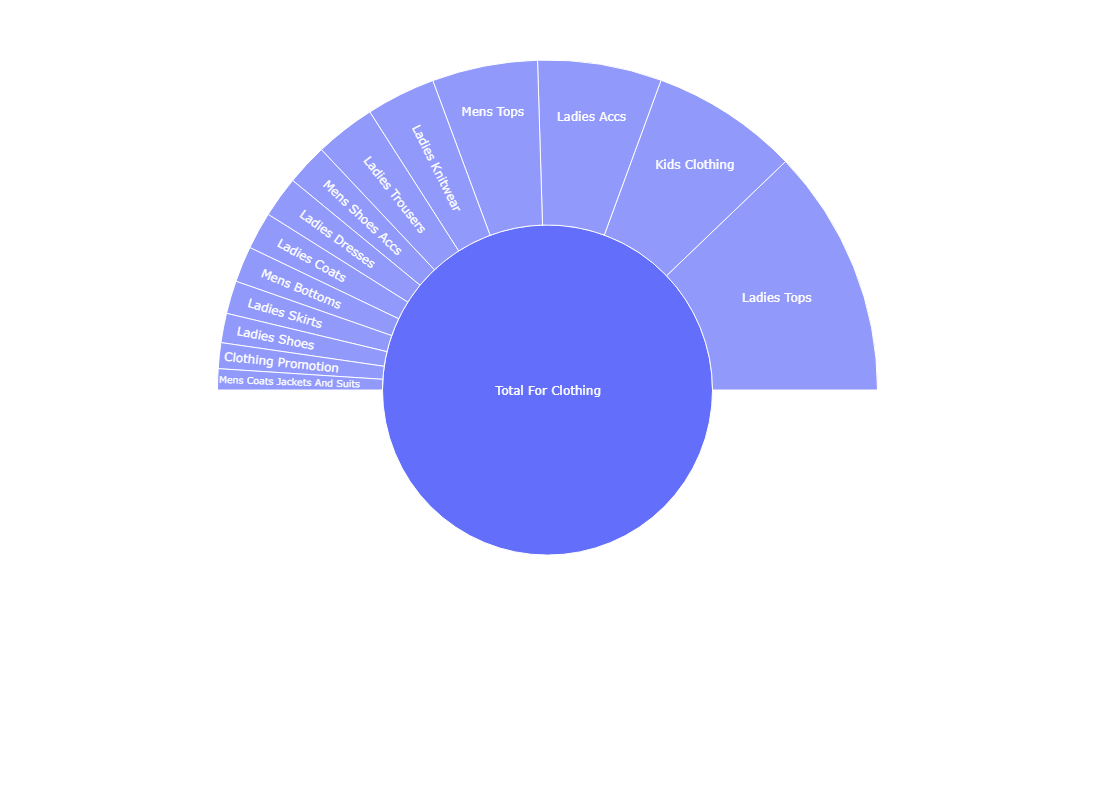

In [51]:
parents = ['Total For Big', 'Total For Big', 'Total For Big', 'Total For Non Clothing', 'Total For Clothing', '', 'Donated And Big Total', 'Total For Non Clothing', 'Total For Non Clothing',
          'Total For Clothing', 'Total For Non Clothing', 'Total For Clothing', 'Total For Clothing', 'Total For Clothing', 'Total For Clothing',
          'Total For Clothing', 'Total For Clothing', 'Total For Clothing', 'Total For Clothing', 'Total For Non Clothing', 'Total For Clothing',
          'Total For Clothing', 'Total For Clothing', 'Total For Clothing', 'Donated And Big Total', 'Donated Total', 'Donated Total']
fig = px.sunburst(names = pivot_sunburst.index, parents = parents, values = pivot_sunburst['No. items sold'], width = 800, height = 800)
fig.show()

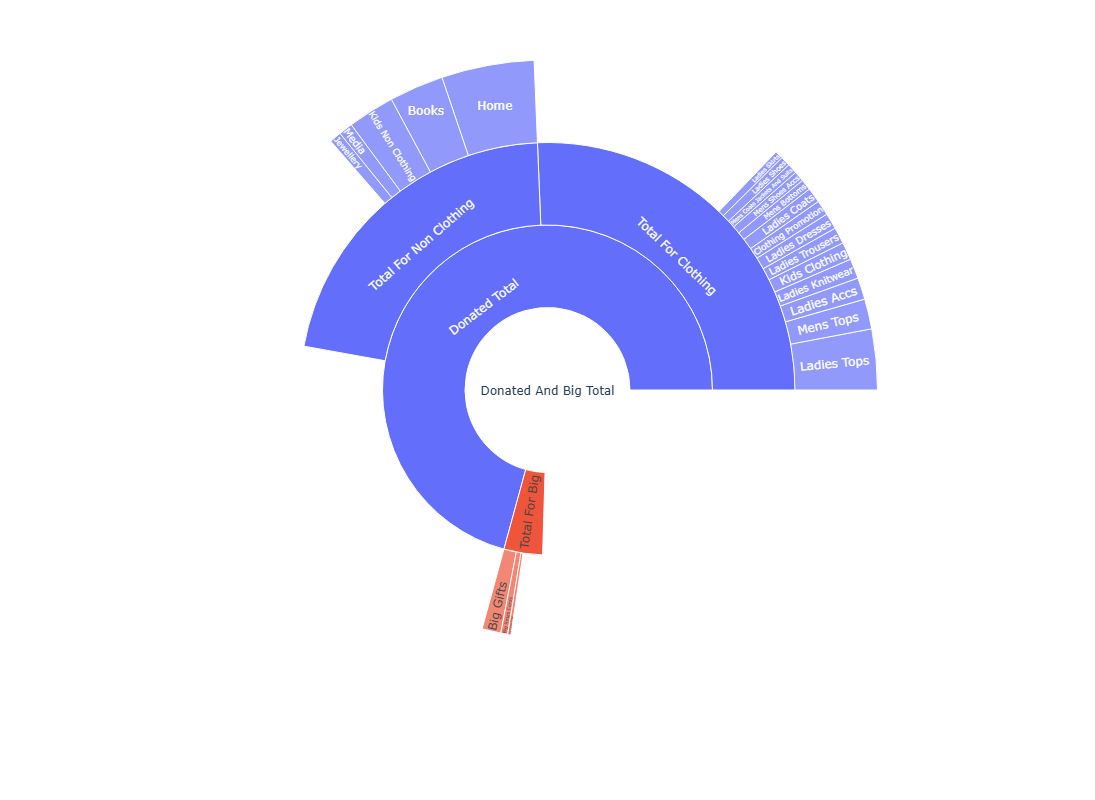

In [53]:
fig = px.sunburst(names = pivot_sunburst.index, parents = parents, values = pivot_sunburst['Dept £'], width = 800, height = 800)
fig.show()

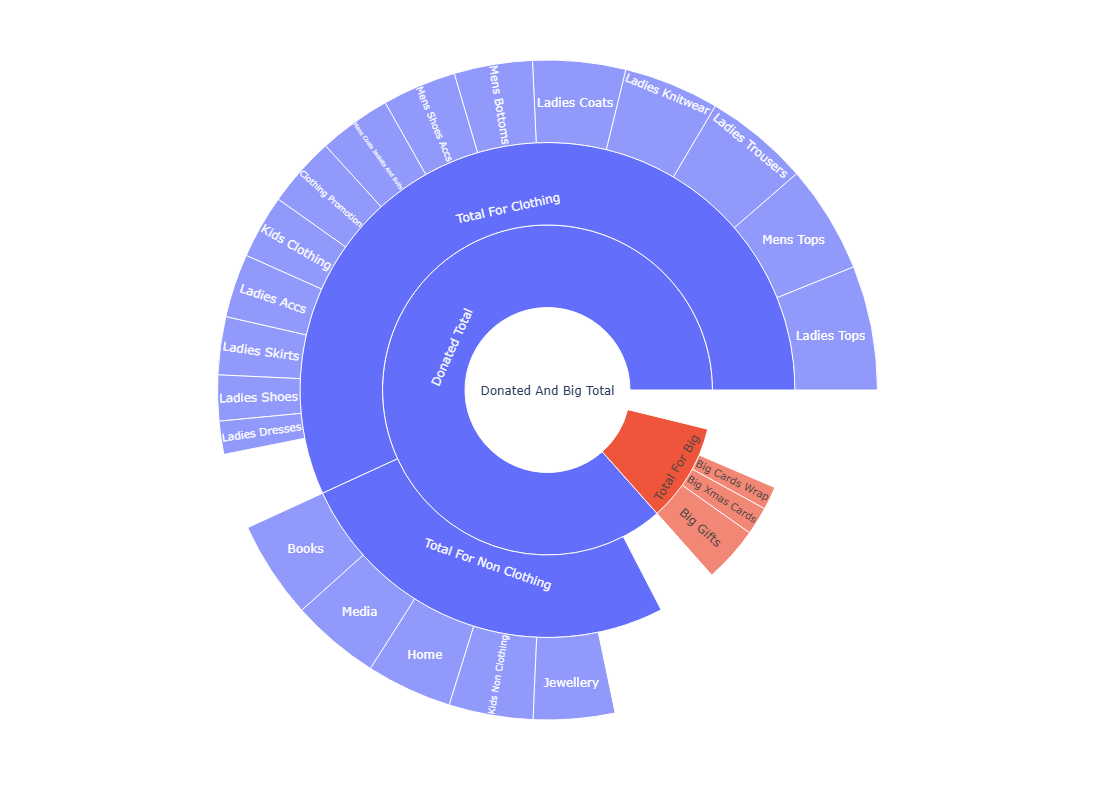

In [61]:
fig = px.sunburst(names = pivot_sunburst.index, parents = parents, values = pivot_sunburst['Average sale per bay £'], width = 800, height = 800)
fig.show()